***Importing_Dependencies***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re # re for representing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
df = pd.read_csv('news_train.csv')

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df = df.drop('id',axis=1)

In [7]:
df = df.fillna(' ')

In [8]:
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [9]:
df.head(3)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [10]:
df['Title and Author'] = df['title'] + '  ' + df['author']

In [11]:
df =df.drop(columns=['title','author'],axis=1)

In [12]:
port_stemmer = PorterStemmer()

In [13]:
def stemming(text):
    stemmed_text = re.sub('[^a-zA-Z]', ' ',text)
    stemmed_text = stemmed_text.lower()
    stemmed_text = stemmed_text.split()
    stemmed_text = [port_stemmer.stem(word) for word in stemmed_text if word not in stopwords.words('english')]
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text

In [14]:
df['Title and Author'] = df['Title and Author'].apply(stemming)

In [15]:
x = df['Title and Author'].values
y = df['label'].values

In [16]:
cv = TfidfVectorizer()

In [17]:
X = cv.fit_transform(x)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
reg = LogisticRegression()

In [20]:
reg.fit(X_train,y_train)

LogisticRegression()

In [21]:
reg.score(X_test,y_test)

0.9759615384615384

In [22]:
reg.score(X_train,y_train)

0.98671875

It can be said good fitted!

***WordCloud(For_Visualizing_Most_Used_Words)***

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
def Word_Cloud(text,title):
    wc = WordCloud().generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
fake = ' '.join(df[df['label']==0]['Title and Author'])
real = ' '.join(df[df['label']==1]['Title and Author'])

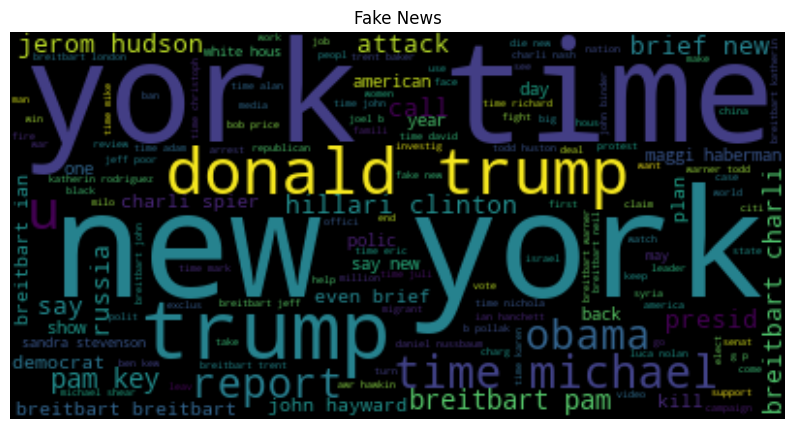

In [30]:
Word_Cloud(fake,'Fake News')
plt.show()

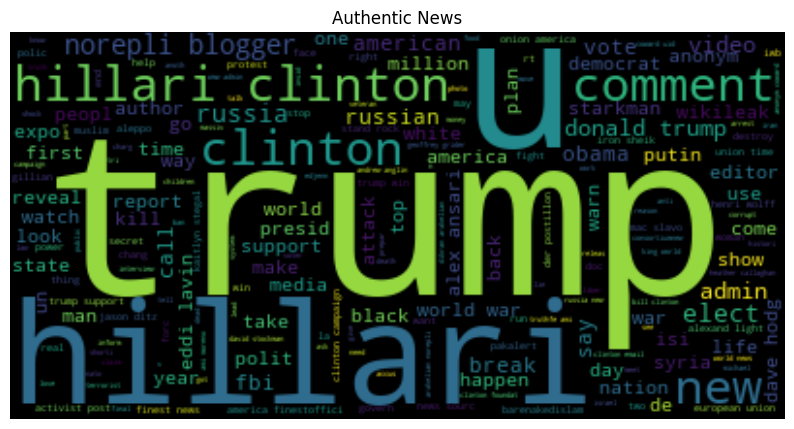

In [31]:
Word_Cloud(real,'Authentic News')
plt.show()